# IMPORTING LIBRARIES 

In [4]:
import numpy as np 
import pandas as pd 


# Reading datasets

In [6]:
dataset = pd.read_excel("SurveyResults.xlsx")
dataset

,ID,Start time,End time,duration,date,Stress level,COVID related,Treating a covid patient,Patient in Crisis,Patient or patient's family,Doctors or colleagues,"Administration, lab, pharmacy, radiology, or other ancilliary services\n",Increased Workload,Technology related stress,Lack of supplies,Documentation,Competency related stress,Saftey (physical or physiological threats),Work Environment - Physical or others: work processes or procedures,Description
0,5C,08:00:00,09:00:00,01:00:00,2020-04-15,1,0,1,0,1,0,0,0,0,0,0,0,0,0,na
1,5C,17:31:00,17:58:00,00:27:00,2020-04-14,1,0,1,0,1,0,0,1,0,0,0,0,0,0,na
2,E4,15:32:00,15:37:00,00:05:00,2020-04-18,2,0,1,0,1,0,0,0,0,0,0,0,0,0,Spoke with family regarding patient's decline ...
3,E4,14:05:00,14:11:00,00:06:00,2020-04-18,2,0,0,0,1,0,0,0,0,0,0,0,0,0,Was placing another FaceTime call to a patient...
4,7A,13:52:00,14:03:00,00:11:00,2020-04-18,2,0,1,0,0,0,0,1,0,0,0,0,0,1,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,83,23:05:00,23:50:00,00:45:00,2020-12-12,2,0,0,0,0,0,0,0,0,0,0,0,0,0,na
354,83,00:12:00,02:01:00,01:49:00,2020-12-13,2,0,1,0,0,0,0,0,0,0,0,0,0,0,na
355,83,20:34:00,20:48:00,00:14:00,2020-12-11,2,0,1,0,0,0,0,0,0,0,0,0,0,0,na
356,83,20:54:00,21:13:00,00:19:00,2020-12-11,2,0,1,0,0,0,0,0,0,0,0,0,0,0,na


  # Cleaning Datasets 

In [7]:
import matplotlib.pyplot as plt

In [8]:
data = pd.read_excel("cleaned_dataset.xlsx")
missing_values = data.isnull().sum()
print("Missing values in the dataset:\n", missing_values)

Missing values in the dataset:
 ID                                                                            0
Start time                                                                    0
End time                                                                      0
duration                                                                    357
date                                                                          0
Stress level                                                                  0
COVID related                                                               245
Treating a covid patient                                                      0
Patient in Crisis                                                             0
Patient or patient's family                                                   0
Doctors or colleagues                                                         0
Administration, lab, pharmacy, radiology, or other ancilliary services\n    245
Increase

# Plotting graph on count vs stress level over the year 

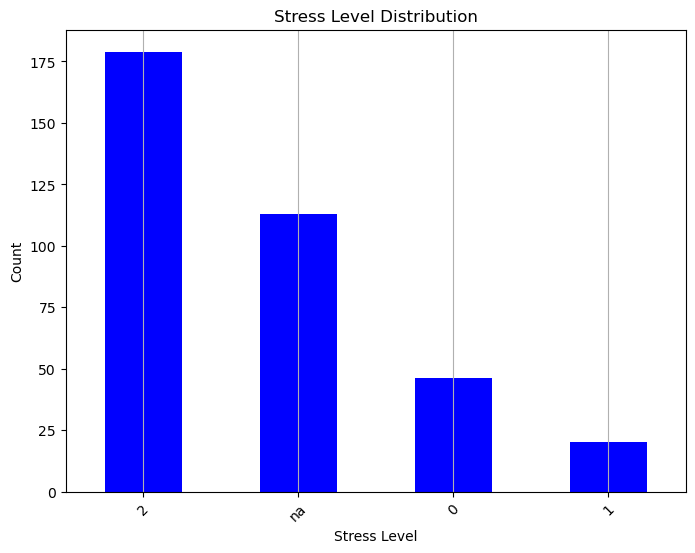

In [9]:
data = pd.read_excel("SurveyResults.xlsx")

# Step 2: Plotting
# Example 1: Plotting Stress Level Distribution
plt.figure(figsize=(8, 6))
data['Stress level'].value_counts().plot(kind='bar', color='blue')
plt.title('Stress Level Distribution')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='x')
plt.show()

Non-numeric values in 'Stress level' column: [nan]


<Figure size 1000x600 with 0 Axes>

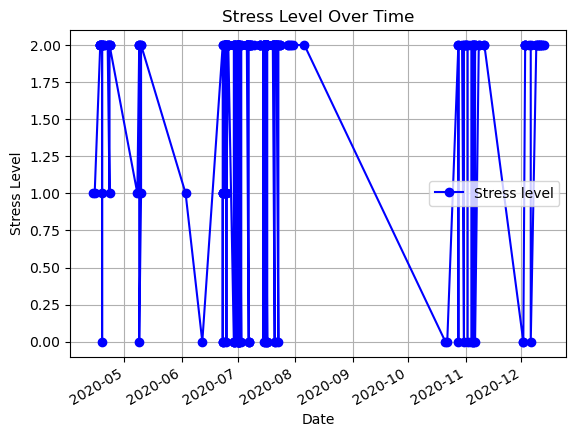

In [10]:
# Convert 'Stress level' column to numeric format
data['Stress level'] = pd.to_numeric(data['Stress level'], errors='coerce')

# Check for any non-numeric values that couldn't be converted
non_numeric_values = data[data['Stress level'].isna()]['Stress level'].unique()
print("Non-numeric values in 'Stress level' column:", non_numeric_values)

# Drop rows with non-numeric values 
data.dropna(subset=['Stress level'], inplace=True)

# Plot the data
plt.figure(figsize=(10, 6))
data.plot(x='date', y='Stress level', kind='line', marker='o', linestyle='-', color='blue')
plt.title('Stress Level Over Time')
plt.xlabel('Date')
plt.ylabel('Stress Level')
plt.grid(True)
plt.show()


In [55]:
import pandas as pd

# Step 1: Read the data from the Excel file into a pandas DataFrame
data = pd.read_excel("SurveyResults.xlsx")

# Step 2: Data Cleaning

# Drop any duplicate rows
data.drop_duplicates(inplace=True)

# Handle missing values
# For demonstration, let's fill missing values in categorical columns with the most frequent value
categorical_columns = ['COVID related', 'Treating a covid patient', 'Patient in Crisis', 
                       "Patient or patient's family", 'Doctors or colleagues', 
                       'Administration, lab, pharmacy, radiology, or other ancilliary services\n', 
                       'Increased Workload', 'Technology related stress', 'Lack of supplies', 
                       'Documentation', 'Competency related stress', 
                       'Saftey (physical or physiological threats)', 
                       'Work Environment - Physical or others: work processes or procedures']
data[categorical_columns] = data[categorical_columns].fillna(data[categorical_columns].mode().iloc[0])

# Convert 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Drop rows with missing or invalid dates
data = data.dropna(subset=['date'])

# Convert 'duration' column to numeric format
data['duration'] = pd.to_numeric(data['duration'], errors='coerce')

# Remove leading and trailing whitespaces from text columns
text_columns = ['COVID related', 'Administration, lab, pharmacy, radiology, or other ancilliary services\n', 'Description']
data[text_columns] = data[text_columns].apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Step 3: Optionally, save the cleaned dataset to a new Excel file
data.to_excel("cleaned_dataset.xlsx", index=False)


In [59]:
print(data.head())


   ID Start time  End time  duration       date Stress level COVID related  \
0  5C   08:00:00  09:00:00       NaN 2020-04-15            1           NaN   
1  5C   17:31:00  17:58:00       NaN 2020-04-14            1           NaN   
2  E4   15:32:00  15:37:00       NaN 2020-04-18            2           NaN   
3  E4   14:05:00  14:11:00       NaN 2020-04-18            2           NaN   
4  7A   13:52:00  14:03:00       NaN 2020-04-18            2           NaN   

  Treating a covid patient Patient in Crisis Patient or patient's family  \
0                        1                 0                           1   
1                        1                 0                           1   
2                        1                 0                           1   
3                        0                 0                           1   
4                        1                 0                           0   

  Doctors or colleagues  \
0                     0   
1                   

In [35]:
cleaned_data = pd.read_excel("cleaned_dataset.xlsx")

# Print the cleaned dataset
print(cleaned_data)

     ID Start time  End time  duration       date Stress level COVID related  \
0    5C   08:00:00  09:00:00       NaN 2020-04-15            1           NaN   
1    5C   17:31:00  17:58:00       NaN 2020-04-14            1           NaN   
2    E4   15:32:00  15:37:00       NaN 2020-04-18            2           NaN   
3    E4   14:05:00  14:11:00       NaN 2020-04-18            2           NaN   
4    7A   13:52:00  14:03:00       NaN 2020-04-18            2           NaN   
..   ..        ...       ...       ...        ...          ...           ...   
352  83   23:05:00  23:50:00       NaN 2020-12-12            2           NaN   
353  83   00:12:00  02:01:00       NaN 2020-12-13            2           NaN   
354  83   20:34:00  20:48:00       NaN 2020-12-11            2           NaN   
355  83   20:54:00  21:13:00       NaN 2020-12-11            2           NaN   
356  BG   19:20:00  19:38:00       NaN 2020-12-11            2           NaN   

    Treating a covid patient Patient in

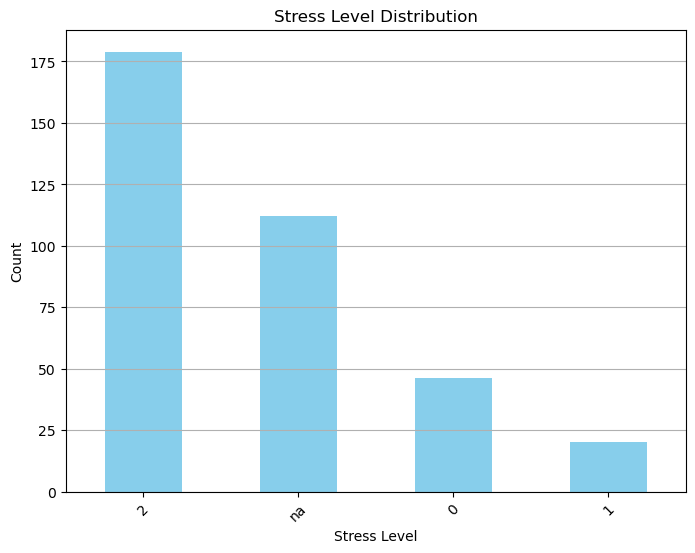

In [25]:
data = pd.read_excel("cleaned_dataset.xlsx")

# Plotting
plt.figure(figsize=(8, 6))
data['Stress level'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Stress Level Distribution')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

<Figure size 1000x600 with 0 Axes>

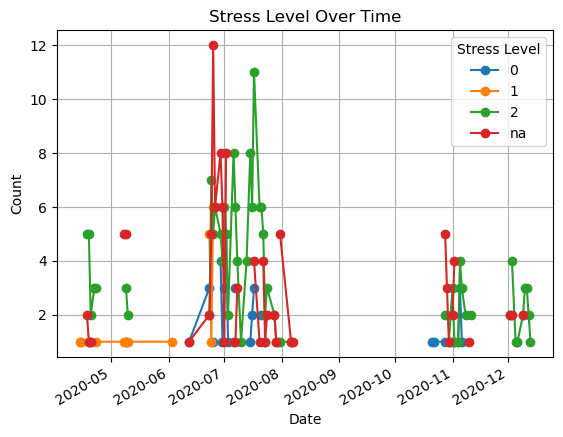

In [28]:
# Convert 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Plotting
plt.figure(figsize=(10, 6))
# Plotting stress level count per date
data.groupby('date')['Stress level'].value_counts().unstack().plot(kind='line', marker='o', linestyle='-')
plt.title('Stress Level Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(True)
plt.legend(title='Stress Level')
plt.show()


In [12]:
import matplotlib.pyplot as plt
import pandas as pd

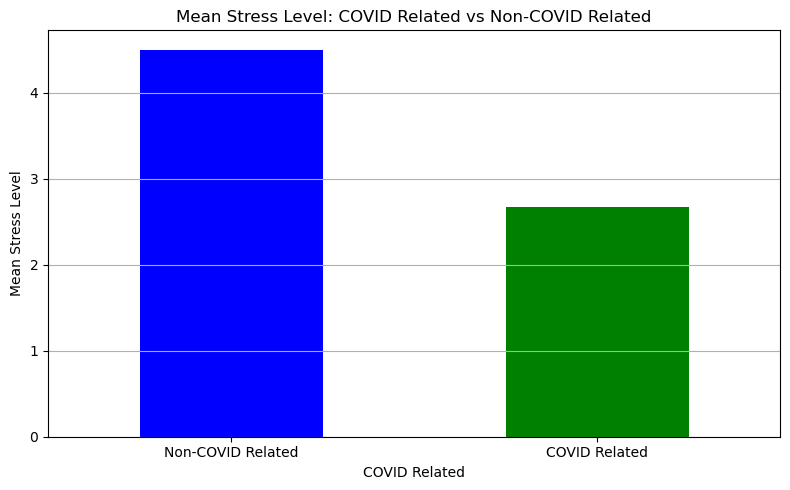

In [13]:
# Plot 2: Bar Plot (Mean stress level for COVID related and non-COVID related)
plt.figure(figsize=(8, 5))
df_grouped = df.groupby('covid_related')['stress_level'].mean()
df_grouped.plot(kind='bar', color=['blue', 'green'])
plt.title('Mean Stress Level: COVID Related vs Non-COVID Related')
plt.xlabel('COVID Related')
plt.ylabel('Mean Stress Level')
plt.xticks(ticks=[0, 1], labels=['Non-COVID Related', 'COVID Related'], rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

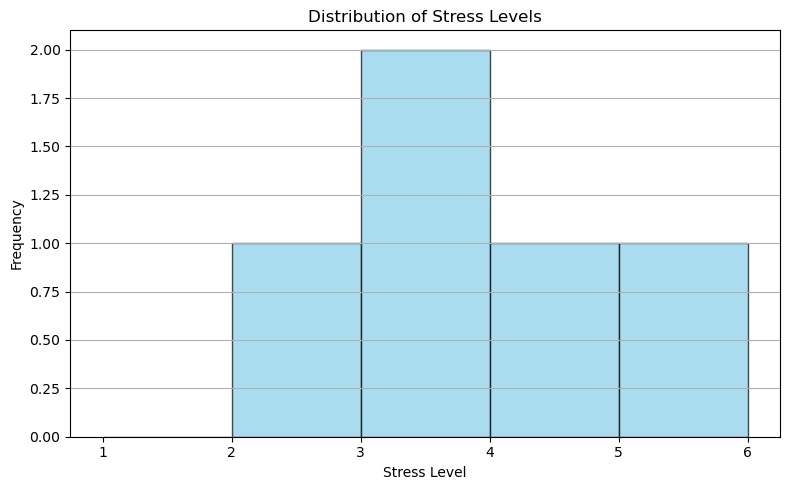

In [3]:
# Plot 3: Histogram (Distribution of stress levels)
plt.figure(figsize=(8, 5))
plt.hist(df['stress_level'], bins=range(1, 7), color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Stress Levels')
plt.xlabel('Stress Level')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [16]:
print(data.columns)
print(data.head())

Index(['ID', 'Start time', 'End time', 'duration', 'date', 'Stress level',
       'COVID related', 'Treating a covid patient', 'Patient in Crisis',
       'Patient or patient's family', 'Doctors or colleagues',
       'Administration, lab, pharmacy, radiology, or other ancilliary services\n',
       'Increased Workload', 'Technology related stress', 'Lack of supplies',
       'Documentation', 'Competency related stress',
       'Saftey (physical or physiological threats)',
       'Work Environment - Physical or others: work processes or procedures',
       'Description'],
      dtype='object')
   ID Start time  End time  duration       date Stress level COVID related  \
0  5C   08:00:00  09:00:00       NaN 2020-04-15            1            na   
1  5C   17:31:00  17:58:00       NaN 2020-04-14            1            na   
2  E4   15:32:00  15:37:00       NaN 2020-04-18            2            na   
3  E4   14:05:00  14:11:00       NaN 2020-04-18            2            na   
4  7A   1

In [17]:
# Drop the specified columns
columns_to_drop = ['Stress level', 'ID', 'Start time', 'End time', 'date', 'Description']
data.drop(columns=columns_to_drop, inplace=True)

# Print the modified dataframe
print(data.head())

   duration COVID related Treating a covid patient Patient in Crisis  \
0       NaN            na                        1                 0   
1       NaN            na                        1                 0   
2       NaN            na                        1                 0   
3       NaN            na                        0                 0   
4       NaN            na                        1                 0   

  Patient or patient's family Doctors or colleagues  \
0                           1                     0   
1                           1                     0   
2                           1                     0   
3                           1                     0   
4                           0                     0   

  Administration, lab, pharmacy, radiology, or other ancilliary services\n  \
0                                                 na                         
1                                                 na                         
2 

In [27]:
import openpyxl

# Load the Excel file using openpyxl
workbook = openpyxl.load_workbook('SurveyResults.xlsx', read_only=True)

# Get the active sheet
sheet = workbook.active

# Convert the sheet to a list of lists
data = []
for row in sheet.iter_rows(values_only=True):
    data.append(row)

# Close the workbook
workbook.close()

# Convert the list of lists into a DataFrame
data_df = pd.DataFrame(data[1:], columns=data[0])


In [28]:
import openpyxl

# Load the Excel file using openpyxl
workbook = openpyxl.load_workbook('SurveyResults.xlsx', read_only=True)

# Get the active sheet
sheet = workbook.active

# Convert the sheet to a Pandas DataFrame
data = pd.DataFrame(sheet.values)

# Close the workbook
workbook.close()


In [4]:
import pandas as pd

data = pd.read_excel('SurveyResults.xlsx', engine='openpyxl')


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Step 1: Load the dataset using pd.read_excel() with na_values parameter
data = pd.read_excel('SurveyResults.xlsx', engine='openpyxl', na_values='na')

# Step 2: Data preprocessing
# Drop irrelevant columns and handle missing values if necessary
data.drop(columns=['ID', 'Start time', 'End time', 'duration', 'date', 'Description'], inplace=True)
data.fillna(0, inplace=True)  # Assuming missing values are replaced with 0

# Step 3: Split the data into features (X) and the target variable (y)
X = data.drop(columns=['Stress level'])  # Features
y = data['Stress level']  # Target variable

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Choose a machine learning algorithm (Random Forest Classifier)
model = RandomForestClassifier()

# Step 6: Train the model on the training data
model.fit(X_train, y_train)

# Step 7: Evaluate the model's performance on the testing data
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6527777777777778


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Step 1: Load the dataset using pd.read_excel() with na_values parameter
data = pd.read_excel('SurveyResults.xlsx', engine='openpyxl', na_values='na')

# Step 2: Data preprocessing
# Drop irrelevant columns and handle missing values if necessary
data.drop(columns=['ID', 'Start time', 'End time', 'duration', 'date', 'Description'], inplace=True)
data.fillna(0, inplace=True)  # Assuming missing values are replaced with 0

# Step 3: Split the data into features (X) and the target variable (y)
X = data.drop(columns=['Stress level'])  # Features
y = data['Stress level']  # Target variable

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Choose a machine learning algorithm (Random Forest Classifier)
model = RandomForestClassifier()

# Step 6: Train the model on the training data
model.fit(X_train, y_train)

# Step 7: Evaluate the model's performance on the testing data
y_pred = model.predict(X_test)

# Evaluate the model using classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

         0.0       0.61      0.81      0.70        27
         1.0       0.33      0.12      0.18         8
         2.0       0.73      0.65      0.69        37

    accuracy                           0.65        72
   macro avg       0.56      0.53      0.52        72
weighted avg       0.64      0.65      0.63        72



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Step 1: Load the dataset using pd.read_excel() with na_values parameter
data = pd.read_excel('SurveyResults.xlsx', engine='openpyxl', na_values='na')

# Step 2: Data preprocessing
# Drop irrelevant columns and handle missing values if necessary
data.drop(columns=['ID', 'Start time', 'End time', 'duration', 'date', 'Description'], inplace=True)
data.fillna(0, inplace=True)  # Assuming missing values are replaced with 0

# Step 3: Split the data into features (X) and the target variable (y)
X = data.drop(columns=['Stress level'])  # Features
y = data['Stress level']  # Target variable

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at each leaf node
}

# Step 6: Choose a machine learning algorithm (Random Forest Classifier)
model = RandomForestClassifier()

# Step 7: Perform Grid Search for hyperparameter tuning
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Step 8: Get the best hyperparameters and retrain the model
best_params = grid_search.best_params_
best_model = RandomForestClassifier(**best_params)
best_model.fit(X_train, y_train)

# Step 9: Evaluate the best model's performance on the testing data
y_pred = best_model.predict(X_test)

# Evaluate the model using classification report
report = classification_report(y_test, y_pred)
print("Best Model Hyperparameters:", best_params)
print("Classification Report for Best Model:\n", report)


In [14]:
pip install Flask

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install shap

  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/39/6c/4ab39615fc3ffe40faaa62fc2feb43868b8ce946c671e84bf476c1e06116/shap-0.45.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for slicer==0.0.7 from https://files.pythonhosted.org/packages/78/c2/b3f55dfdb8af9812fdb9baf70cacf3b9e82e505b2bd4324d588888b81202/slicer-0.0.7-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/453.1 kB ? eta -:--:--
   --- ----------------------------------- 41.0/453.1 kB 653.6 kB/s eta 0:00:01
   -------- ----------------------------- 102.4/453.1 kB 980.4 kB/s eta 0:00:01
   ---------------- ----------------------- 184.3/453.1 kB 1.2 MB/s eta 0:00:01
   ------------------------- -------------- 286.7/453.1 kB 1.5 MB/s eta 0:00:01
   ------------------------------------ --- 409.6/453.1 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 453.1/453.1 kB 1.8 MB/s eta 0:00:00
Note: you may need to restart the kernel t

C:\Users\KIIT\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:962: UserWarning: The figure layout has changed to tight
  pl.tight_layout()
C:\Users\KIIT\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:636: UserWarning: The figure layout has changed to tight
  pl.tight_layout(pad=0, w_pad=0, h_pad=0.0)


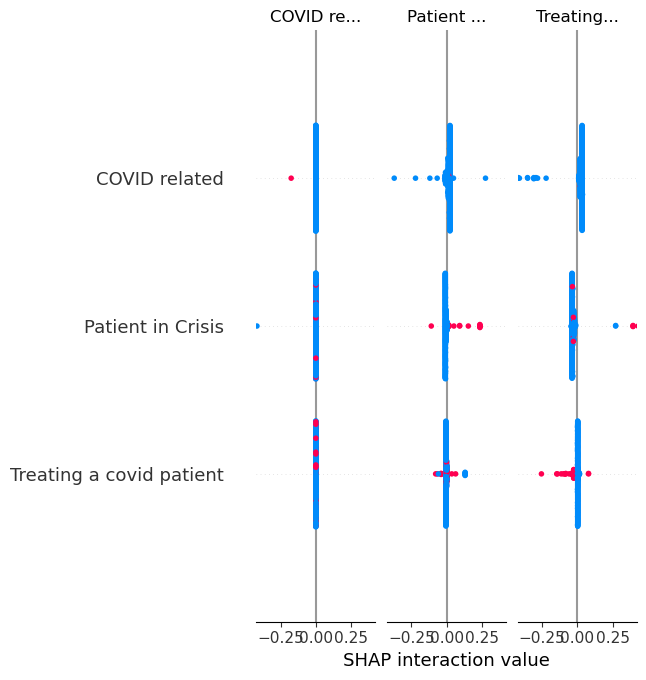

Feature Importance:
COVID related: 0.0432442509255592
Treating a covid patient: 0.008305165863673051
Patient in Crisis: 0.03583700952457618


In [11]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import shap

# Load the dataset
data = pd.read_excel('SurveyResults.xlsx', engine='openpyxl', na_values='na')

# Data preprocessing
data.drop(columns=['ID', 'Start time', 'End time', 'duration', 'date', 'Description'], inplace=True)
data.fillna(0, inplace=True)  # Assuming missing values are replaced with 0

# Label encode non-numeric columns
label_encoder = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = label_encoder.fit_transform(data[column])

# Split the data into features (X) and the target variable (y)
X_train = data.drop(columns=['Stress level'])
y_train = data['Stress level']

# Model training
model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1)
model.fit(X_train, y_train)

# Initialize the SHAP explainer with the trained model
explainer = shap.Explainer(model, X_train)

# Calculate SHAP values for all samples
shap_values = explainer.shap_values(X_train)

# Plot SHAP summary plot to visualize feature importance
shap.summary_plot(shap_values, X_train, plot_type="bar")


# Get feature importance using SHAP
feature_importance = np.abs(shap_values[0]).mean(axis=0)

# Print feature importance scores
print("Feature Importance:")
for feature, importance in zip(X_train.columns, feature_importance):
    print(f"{feature}: {importance}")


In [15]:
python train_model.py


SyntaxError: invalid syntax (3662748302.py, line 1)